In [ ]:

from google.colab import drive

drive.mount('/content/drive')


dataset_path = "/content/drive/MyDrive/fruitdataset"


import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


IMG_SIZE = (128, 128)
BATCH_SIZE = 32
VAL_SPLIT = 0.2
SEED = 123
EPOCHS = 30

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
-

train_gen = train_val_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED,
)

val_gen = train_val_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
    shuffle=False,
    seed=SEED,
)

NUM_CLASSES = train_gen.num_classes
print("Found", NUM_CLASSES, "classes:", train_gen.class_indices)

Found 288 images belonging to 9 classes.
Found 71 images belonging to 9 classes.
Found 9 classes: {'apple fruit': 0, 'banana fruit': 1, 'cherry fruit': 2, 'chickoo fruit': 3, 'grapes fruit': 4, 'kiwi fruit': 5, 'mango fruit': 6, 'orange fruit': 7, 'strawberry fruit': 8}


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=IMG_SIZE + (3,)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation="softmax"),
])

model.compile(
    optimizer=optimizers.Adam(),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,801 (12.61 MB)

 Trainable params: 3,305,801 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    callbacks=[early_stop],
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.1132 - loss: 2.3824 - val_accuracy: 0.1549 - val_loss: 2.1571
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.1629 - loss: 2.1271 - val_accuracy: 0.1972 - val_loss: 2.0020
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.2472 - loss: 1.9463 - val_accuracy: 0.3099 - val_loss: 1.7103
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2593 - loss: 1.8225 - val_accuracy: 0.4225 - val_loss: 1.5263
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - accuracy: 0.3741 - loss: 1.6272 - val_accuracy: 0.5070 - val_loss: 1.4299
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.4003 - loss: 1.5784 - val_accuracy: 0.5070 - val_loss: 1.3922
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4628 - loss: 1.4961 - val_accuracy: 0.5775 - val_loss: 1.3323
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.4607 - loss: 1.4126 - val_accuracy: 0.5211 - val_loss: 1.3192
Epoch 9/

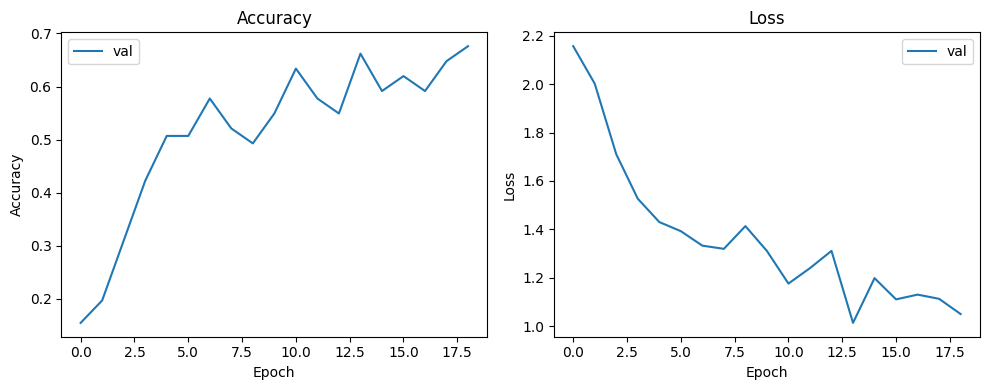

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='val')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 746ms/step


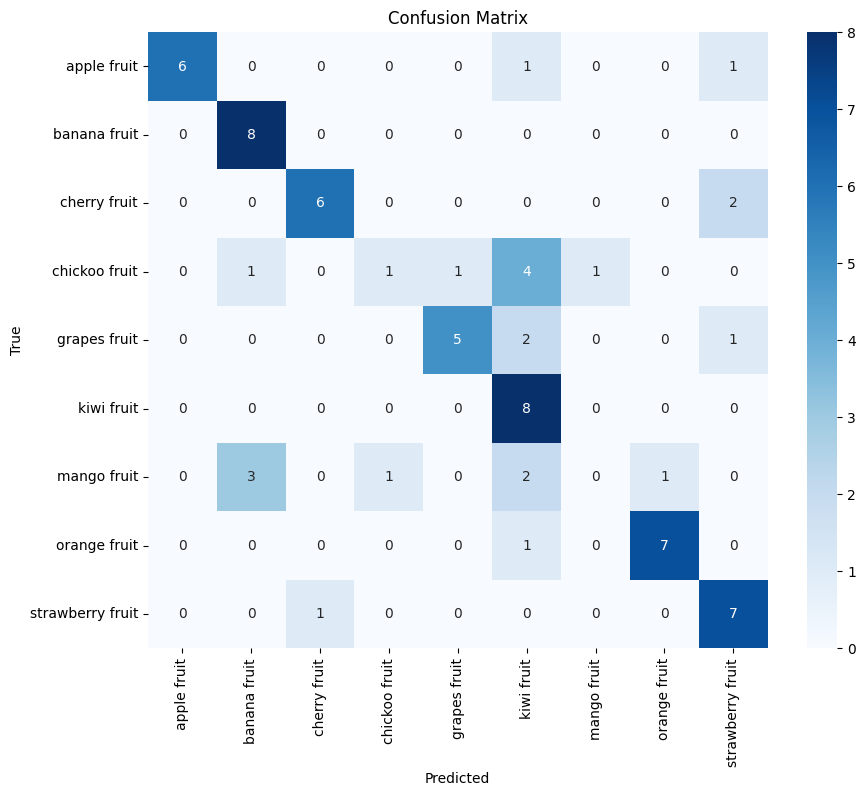

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(val_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=val_gen.class_indices, yticklabels=val_gen.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


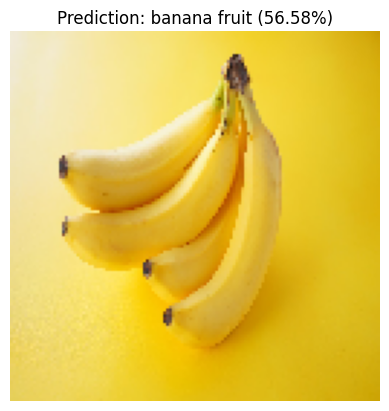

Top 3 predictions:
banana fruit: 56.58%
mango fruit: 30.37%
orange fruit: 8.48%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


img_path = "/content/drive/MyDrive/banan.jpg"
img_height, img_width = IMG_SIZE

img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)


class_names = list(train_gen.class_indices.keys())

predictions = model.predict(img_array)[0]
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_names[predicted_class_index]
confidence = predictions[predicted_class_index]

plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_class_name} ({confidence*100:.2f}%)")
plt.show()

top_3_indices = predictions.argsort()[-3:][::-1]
print("Top 3 predictions:")
for i in top_3_indices:
    print(f"{class_names[i]}: {predictions[i]*100:.2f}%")